# Image Compression with Kmeans
By Amee Tan 

**NOTE**: For this project, I implemented the Kmeans algorithm from scratch in the kmeans.py file, which was run to create this notebook. However, my professor requested that we keep that code private, so that file is not included in this repo.

## Kmeans
### What
Kmeans is a form of unsupervised learning that groups data points that are close to each other in Euclidean space into a predetermined number of clusters, K.

### Why
- We do kmeans to learn more about X (ex. density, interesting subregions)
- Example use cases:
    - Color quantization (image compression --> ex. recreate a picture using 10 colors instead of 9,000 colors) 
    - Digit recognition (each cluster represents a digit from 0-9)
    
### When
- We have balanced data
- We have distinct, continuous clusters 

### How
1.  To start, you select K points to be the initial centroids of the clusters. There are 2 different ways of doing this:
    - kmeans: Randomly select k points as the initial centroids. 
    - kmeans++: Randomly select the 1st point, then find the point that is the farthest away from that point. These are the first two centroids. From then on, for each x, determine which centroid is the closest, add that value to a list, then select the point with the largest distance. That is the 3rd centroid. Repeat until you have k centroids. 
2.  After selecting the centroids, assign each point to the cluster that it is closest to. 
3.  Calculate the mean of the points in each cluster. These values becomes the new centroids.
4.  Reassign points to the clusters.
5.  Repeat steps 3 and 4 until the clusters stop changing.

Note: How is distance between points calculated? 
We calculate the Euclidean distance, as seen in the equation below. Numpy's ```linalg.norm(point1-point2)``` does the trick. 

The image below comes from this video, which does a great job explaining the concept of Kmeans! https://www.youtube.com/watch?v=4b5d3muPQmA

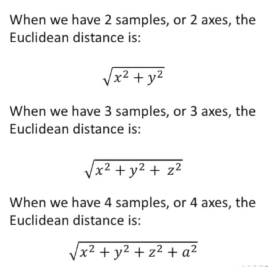

In [81]:
Image(filename='euclidean_distance.png')

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Image

%run kmeans

# Image Compression (color quantization)
One cool application of kmeans clustering is that we can use it to compress images. Instead of having images composed of tens of thousands of colors, we can recreate the images using any number of colors that we want!

**How does that work?**
- Each pixel can be thought of as a point in 3D space, with Red, Green, and Blue as the 3 dimensions. The color in each pixel is some combination of Red, Green, and Blue. There are tens of thousands of different colors in any given picture. 
- Let's say we want to recreate an image with 10 colors. Regular kmeans will randomly pick 10 of those pixels as the centroids. Kmeans++ will pick 10 colors that maximize the minimum distance between centroids. 
- For each pixel, we will see which centroid it is closest to and assign it to that cluster. 
- We now have a mapping from each pixel to one of the 10 colors. We can go through the original array and replace each pixel's RGB coordinates with the RGB coordinates of the cluster that that pixel was assigned to. The entire array will now consist of 10 unique RGB values. 


In [2]:
from PIL import Image
from numpy import asarray

In [3]:
# Code adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [4]:
img = Image.open('images/sprinkles.jpeg') # Load the image

img_array3D = np.array(img, dtype=np.float64) / 255 # Make data in range [0,1]

w, h, d = original_shape = tuple(img_array3D.shape) # Store the dimensions of the array 

img_array2D = np.reshape(img_array3D, (w * h, d)) # Transform to a 2D array with shape (w*h,3)

k=4
centroids4, labels4 = kmeans(img_array2D, k=k, centroids='kmeans++', tolerance=.01)
labels4 = np.array(labels4)

k=10
centroids10, labels10 = kmeans(img_array2D, k=k, centroids='kmeans++', tolerance=.01)
labels10 = np.array(labels10)

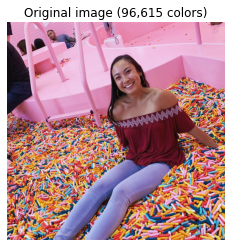

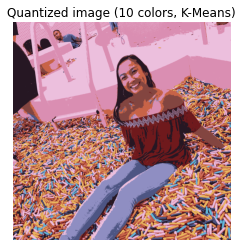

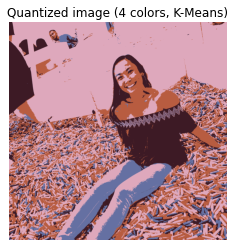

In [6]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(img)
plt.savefig("images/sprinkles_og.jpg")

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (10 colors, K-Means)')
plt.imshow(recreate_image(np.array(centroids10), labels10, w, h))
plt.savefig("images/sprinkles_10colors.jpg")

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (4 colors, K-Means)')
plt.imshow(recreate_image(np.array(centroids4), labels4, w, h))
plt.savefig("images/sprinkles_4colors.jpg")

plt.savefig("images/sprinkles_quantized_images.jpg")

plt.show()

This is a picture I took at the Museum of Ice Cream. It's amazing that the picture using only 10 colors still looks pretty close to the original image! Once we go down to 4 colors, the image quality greatly decreased, but still, not as bad as I would have expected! 

In [ ]:
img = Image.open('wedding.jpeg') # Load the image

img_array3D = np.array(img, dtype=np.float64) / 255 # Make data in range [0,1]

w, h, d = original_shape = tuple(img_array3D.shape) # Store the dimensions of the array 

img_array2D = np.reshape(img_array3D, (w * h, d)) # Transform to a 2D array with shape (w*h,3)

k=4
centroids4, labels4 = kmeans(img_array2D, k=k, centroids='kmeans++', tolerance=.01)
labels4 = np.array(labels4)

k=10
centroids10, labels10 = kmeans(img_array2D, k=k, centroids='kmeans++', tolerance=.01)
labels10 = np.array(labels10)

In [ ]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(img)
plt.savefig("quantized_og.jpg")

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (10 colors, K-Means)')
plt.imshow(recreate_image(np.array(centroids10), labels10, w, h))
plt.savefig("quantized_10colors.jpg")

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (4 colors, K-Means)')
plt.imshow(recreate_image(np.array(centroids4), labels4, w, h))
plt.savefig("quantized_4colors.jpg")

plt.savefig("quantized_images.jpg")

plt.show()